# LEGO history project

This project aims at identification of key facts about lego sets and parts. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('pastel')

## Data import

Data was obtained from rebrickable. This dataset is updated daily, the version used was downloaded on 2023-11-10. For analysis of sets, the cutoff year is set to 2022. 

In [2]:
colors = pd.read_csv('data/colors.csv.gz', 
                     compression='gzip', sep=',')
elements = pd.read_csv('data/elements.csv.gz', 
                       compression='gzip', sep=',')
inventories = pd.read_csv('data/inventories.csv.gz', 
                          compression='gzip', sep=',')
inventory_minifigs = pd.read_csv('data/inventory_minifigs.csv.gz', 
                                 compression='gzip', sep=',')
inventory_parts = pd.read_csv('data/inventory_parts.csv.gz', 
                              compression='gzip', sep=',')
inventory_sets = pd.read_csv('data/inventory_sets.csv.gz', 
                             compression='gzip', sep=',')
minifigs = pd.read_csv('data/minifigs.csv.gz', 
                       compression='gzip', sep=',')
part_categories = pd.read_csv('data/part_categories.csv.gz', 
                              compression='gzip', sep=',')
part_relationships = pd.read_csv('data/part_relationships.csv.gz', 
                                 compression='gzip', sep=',')
parts = pd.read_csv('data/parts.csv.gz', 
                    compression='gzip', sep=',')
sets = pd.read_csv('data/sets.csv.gz', 
                   compression='gzip', sep=',')
themes = pd.read_csv('data/themes.csv.gz',  
                     compression='gzip', sep=',')

# Sets analysis

At first, sets are merged with themes. Then, the analysis was performed for 5 themes with the biggest number of sets throughout the years. 

In [3]:
sets = sets[sets['num_parts'] > 0]
sets_themes = sets.merge(themes, how='left', 
                         left_on='theme_id',
                         right_on='id',
                         suffixes=['_sets', '_themes'])
sets_themes = sets_themes.drop(columns=['id', 'theme_id'])
sets_themes['name_themes'] = sets_themes['name_themes'].str.replace('UCS', 'Ultimate Collector Series')

excluded_themes = ['Books', 'Key Chain', 'Gear', 'Supplemental', 'Service Packs', 'Stationery and Office Supplies', 'Video Games and Accessories', 'Houseware', 'Role Play Toys and Costumes', 'Clocks and Watches', 'LEGO Brand Store', 'Promotional', 'Storage', 'Plush Toys', 'Bag and Luggage Tags', 'Audio and Visual Media', 'Dimensions']

filtered_sets = sets_themes[~sets_themes['name_themes'] \
                            .isin(excluded_themes)]
themes_count = filtered_sets['name_themes'].value_counts()

n_themes = 7
included_themes = list(themes_count.head(n_themes).index)
df_sets = sets_themes.copy()
df_sets = df_sets[df_sets['name_themes'].isin(included_themes)]
print(f'List of excluded themes ({100 - (100 * len(filtered_sets) / len(sets)):.2f} %):')
print(excluded_themes)
print(f'\nList of included themes ({(100 * len(df_sets) / len(sets)):.2f} %):')
print(included_themes)

List of excluded themes (11.37 %):
['Books', 'Key Chain', 'Gear', 'Supplemental', 'Service Packs', 'Stationery and Office Supplies', 'Video Games and Accessories', 'Houseware', 'Role Play Toys and Costumes', 'Clocks and Watches', 'LEGO Brand Store', 'Promotional', 'Storage', 'Plush Toys', 'Bag and Luggage Tags', 'Audio and Visual Media', 'Dimensions']

List of included themes (23.02 %):
['Technic', 'Star Wars', 'Friends', 'Ninjago', 'Basic Set', 'Town', 'Classic Town']


## Set analysis over the years

### Mean number of parts through the years

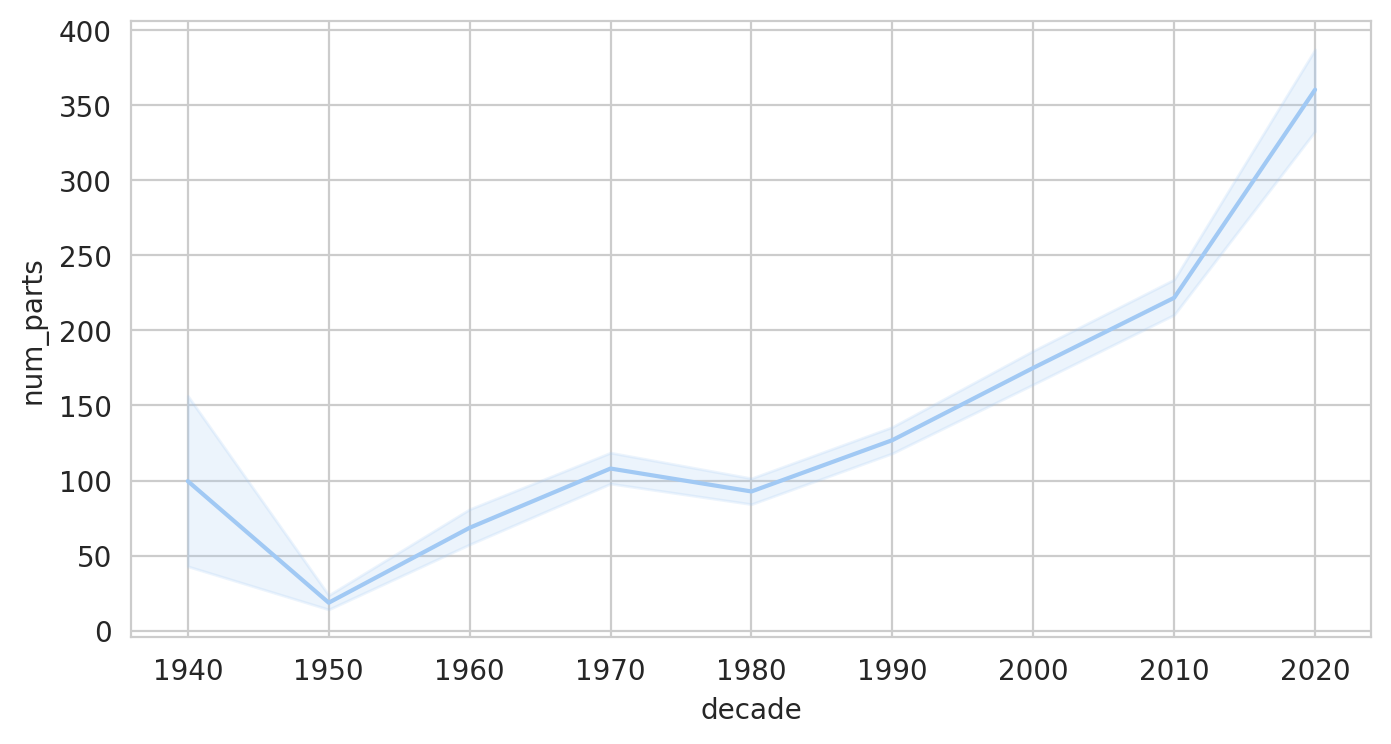

In [4]:
sets_themes['decade'] = (sets_themes['year'] // 10) * 10
plt.figure(figsize=(8, 4))
sns.lineplot(data=sets_themes, x='decade', y='num_parts')
plt.show()

### Most popular themes through the years

This section shows top themes containing the most sets through the years. 

In [5]:
for i in included_themes:
    i_corr = i.replace(" ","_")
    df_sets.loc[:, i_corr] = df_sets['num_parts'].where(df_sets['name_themes'] == i)

In [6]:
print(df_sets.groupby('name_themes')['year'].agg(['min', 
                                                  'median', 
                                                  'max',
                                                  ('range', lambda x: x.max() - x.min())]))

               min  median   max  range
name_themes                            
Basic Set     1958  1997.0  2023     65
Classic Town  1978  1988.0  1997     19
Friends       2012  2018.0  2023     11
Ninjago       2011  2018.0  2023     12
Star Wars     1999  2015.0  2023     24
Technic       1965  2002.0  2023     58
Town          1978  2002.0  2023     45


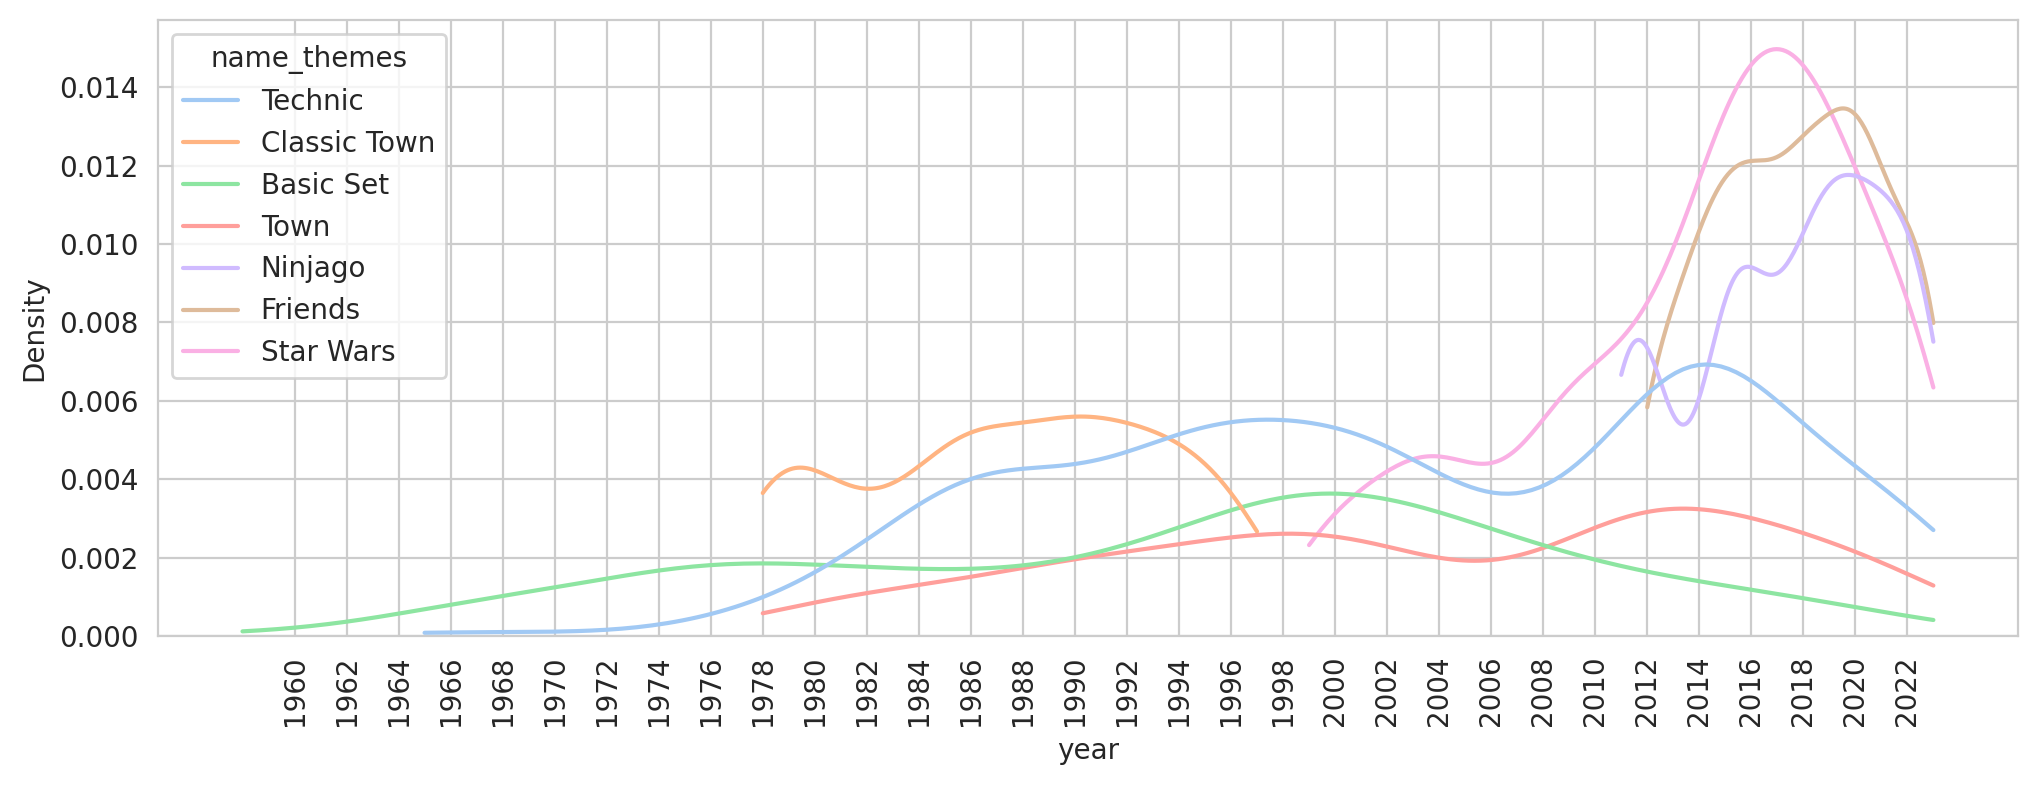

In [7]:
plt.figure(figsize=(12, 4))
g = sns.kdeplot(data=df_sets, x='year', hue='name_themes', palette='pastel', cut=0)
xticks = np.arange(df_sets['year'].min(), 2024, 1)
xticks = np.arange(1960, 2024, 2)
g.set_xticks(xticks)
g.set_xticklabels(xticks, rotation=90)
plt.show()

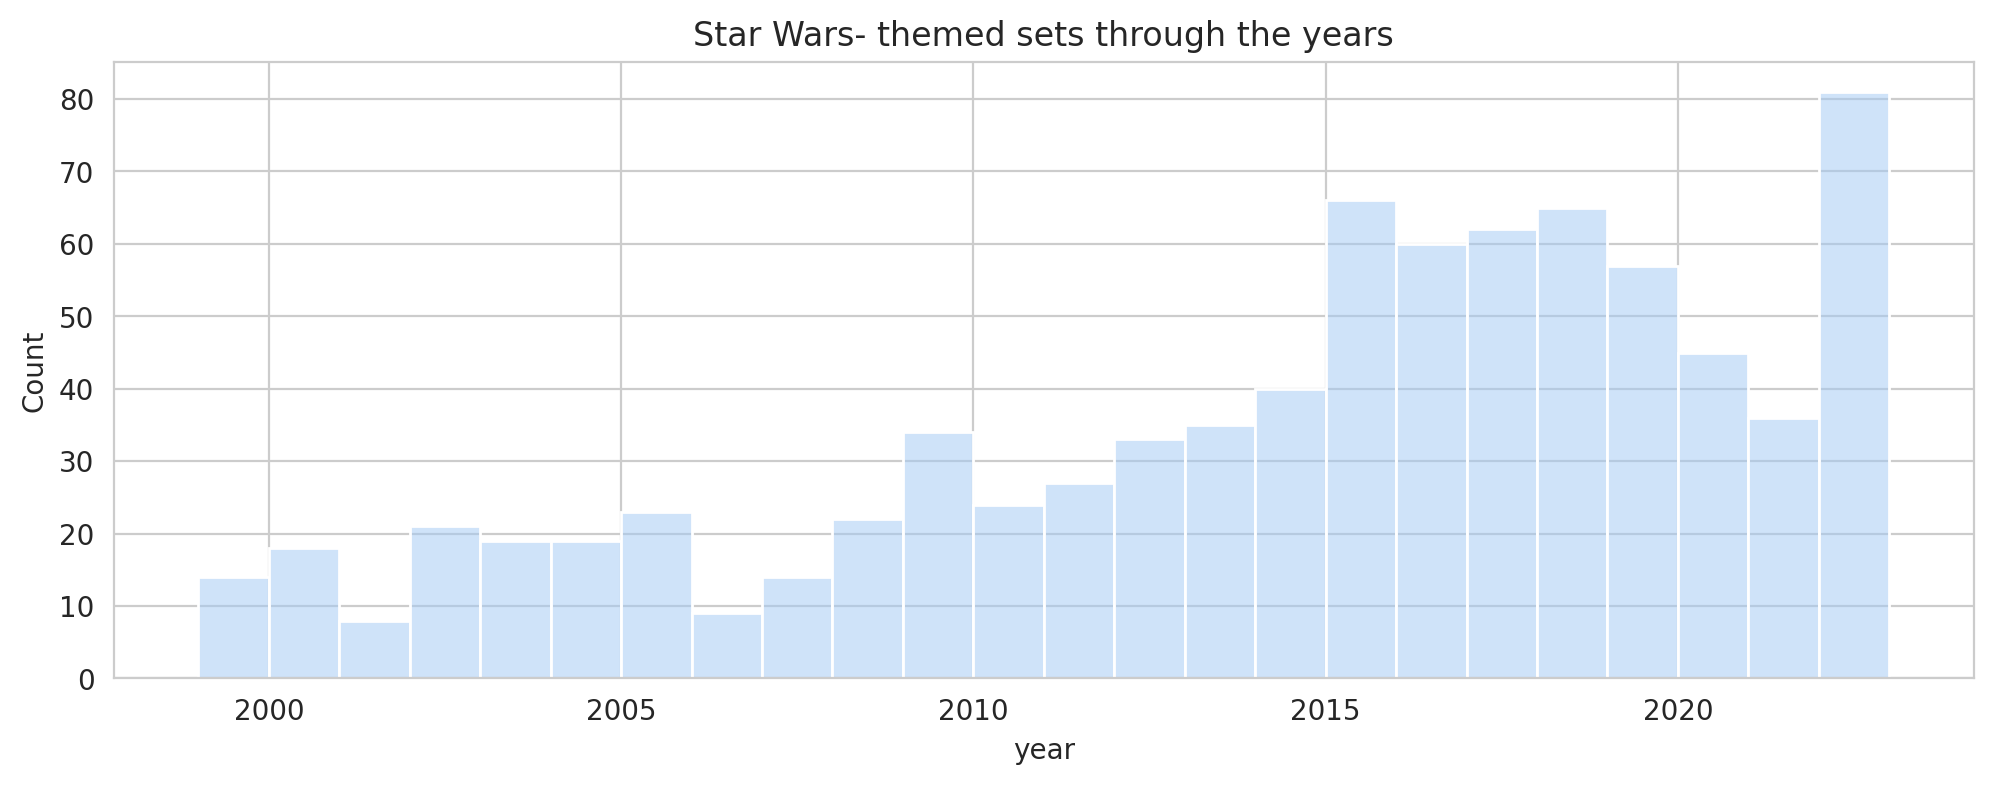

In [8]:
plt.figure(figsize=(12,4))
sns.histplot(data=df_sets[df_sets['name_themes'] == 'Star Wars'], x='year', binwidth=1, alpha=0.5)
plt.title('Star Wars- themed sets through the years')
plt.show()

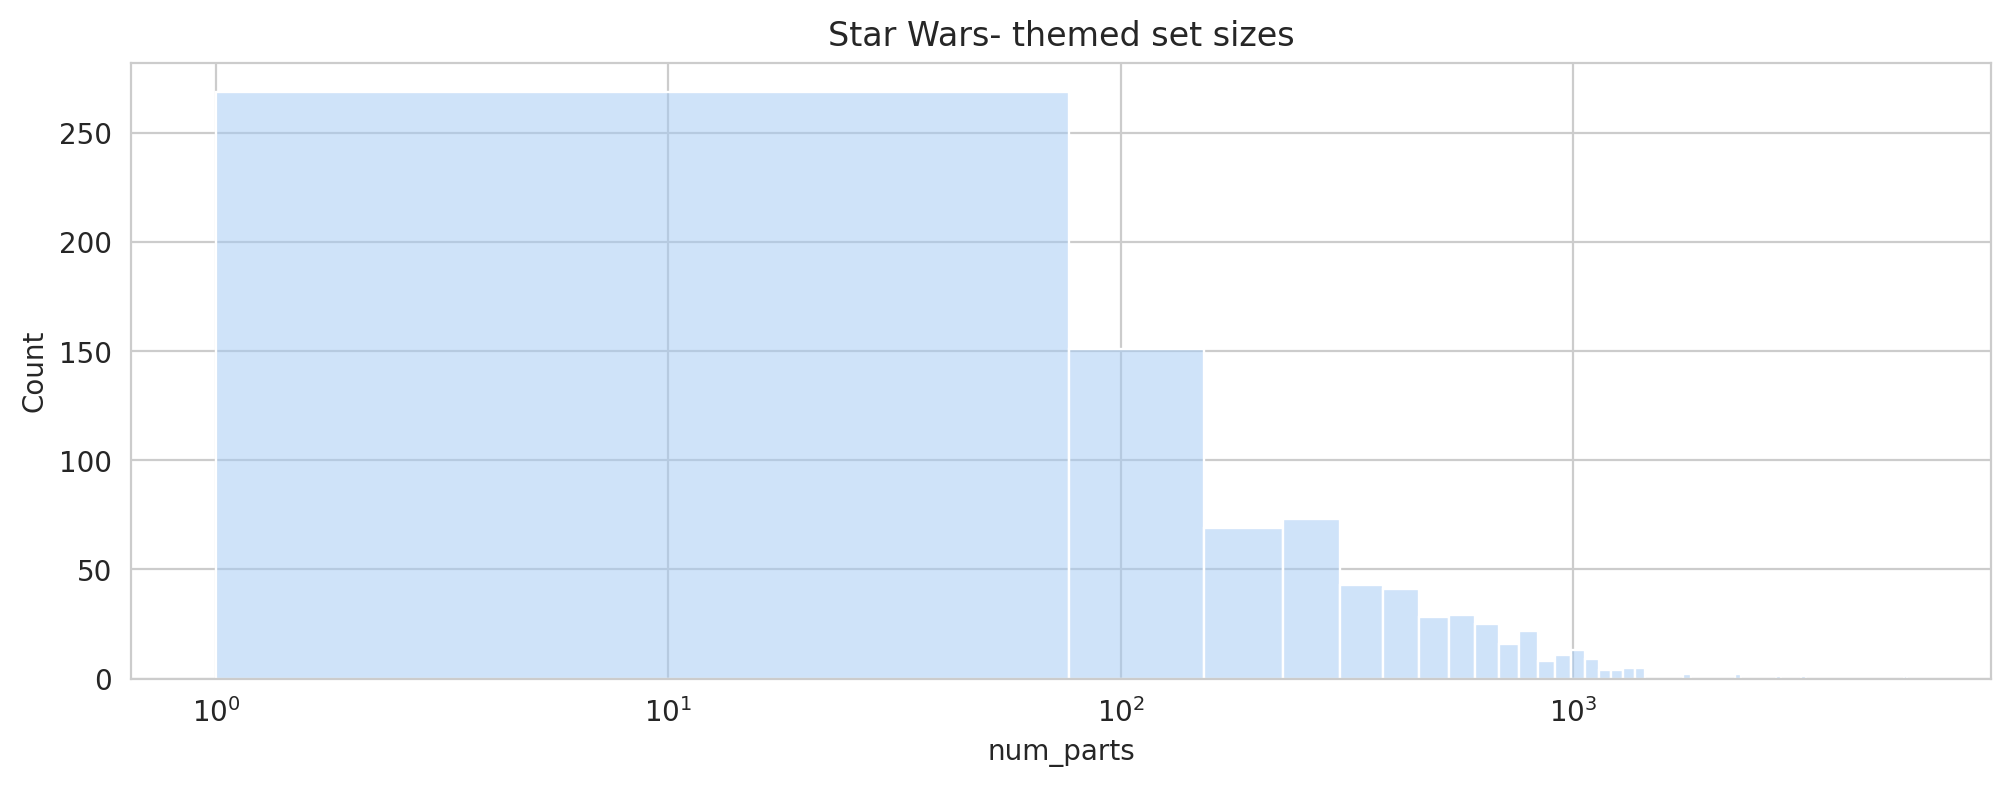

In [9]:
plt.figure(figsize=(12,4))
sns.histplot(data=df_sets[df_sets['name_themes'] == 'Star Wars'], x='num_parts', alpha=0.5)
plt.xscale('log')
plt.title('Star Wars- themed set sizes')
plt.show()

### Number of parts through the years

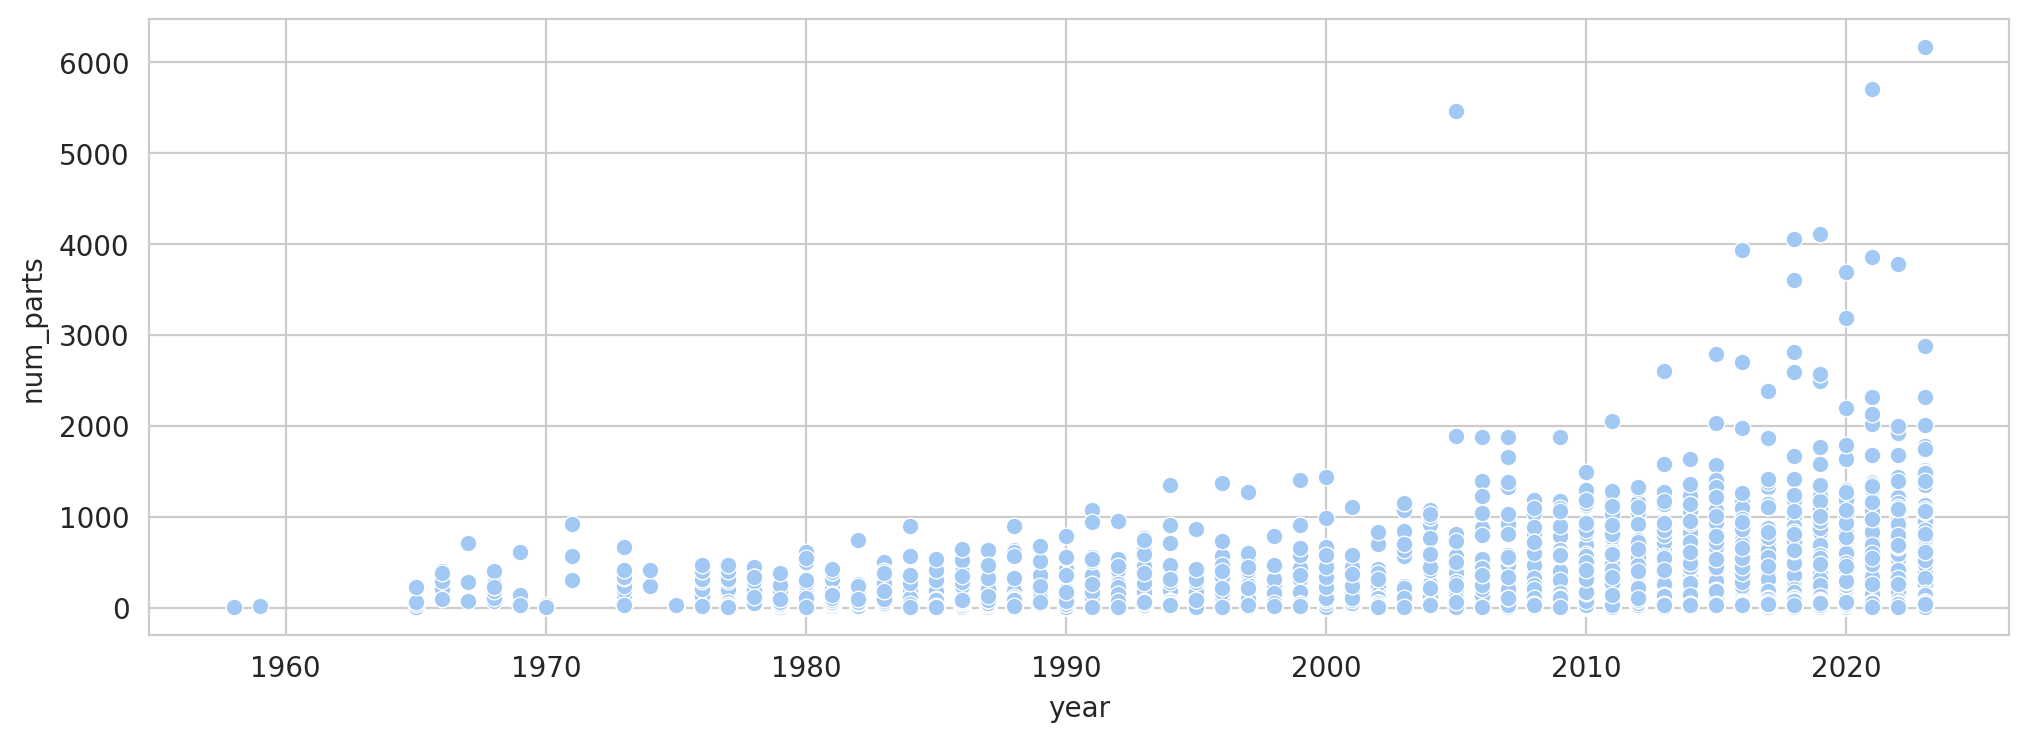

In [10]:
plt.figure(figsize=(12, 4))
sns.scatterplot(data=df_sets, x='year', y='num_parts')
plt.show()

In [11]:
sets_3000 = sets[sets['num_parts'] > 3000].sort_values('num_parts')
for index, row in sets_3000.iterrows():
    print(f'"{row["name"]}" with {row["num_parts"]} pcs from year {row["year"]}')

"Hogwarts Icons Collectors' Edition" with 3012 pcs from year 2021
"Tree House" with 3037 pcs from year 2019
"Boutique Hotel" with 3068 pcs from year 2022
"Imperial Star Destroyer" with 3116 pcs from year 2002
"Jurassic Park: T. rex Rampage" with 3120 pcs from year 2019
"Captain America's Shield" with 3128 pcs from year 2023
"Super Star Destroyer" with 3152 pcs from year 2011
"Marvel Studios Iron Man" with 3167 pcs from year 2020
"Welcome to Apocalypseburg!" with 3178 pcs from year 2019
"Mos Eisley Cantina" with 3187 pcs from year 2020
"Haunted House" with 3232 pcs from year 2020
"Grand Carousel" with 3261 pcs from year 2009
"Republic Gunship" with 3292 pcs from year 2021
"Sandcrawler" with 3296 pcs from year 2014
"1989 Batmobile" with 3310 pcs from year 2019
"Andy Warhol's Marilyn Monroe" with 3341 pcs from year 2020
"Modular Construction Site" with 3374 pcs from year 2023
"The Sith" with 3406 pcs from year 2020
"Eiffel Tower 1:300" with 3428 pcs from year 2007
"The Joker Manor" with 3

## Database exploration

In [12]:
print(f"Number of Lego sets in the dataset: {sets.shape[0]} rows")
print(f"Number of columns in the dataset: {sets.shape[1]} columns")

Number of Lego sets in the dataset: 17243 rows
Number of columns in the dataset: 6 columns


In [13]:
print(sets.info())
print('-------------------------------')
print(sets.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17243 entries, 0 to 21939
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    17243 non-null  object
 1   name       17243 non-null  object
 2   year       17243 non-null  int64 
 3   theme_id   17243 non-null  int64 
 4   num_parts  17243 non-null  int64 
 5   img_url    17243 non-null  object
dtypes: int64(3), object(3)
memory usage: 943.0+ KB
None
-------------------------------
               year      theme_id     num_parts
count  17243.000000  17243.000000  17243.000000
mean    2006.181175    412.134779    204.854840
std       14.669965    213.726538    461.485034
min     1949.000000      1.000000      1.000000
25%     1999.000000    230.000000     18.000000
50%     2011.000000    453.000000     54.000000
75%     2017.000000    580.000000    202.000000
max     2023.000000    751.000000  11695.000000


In [14]:
max_pieces_bool = sets['num_parts'] == sets['num_parts'].max()
max_pieces_set = sets.loc[max_pieces_bool].iloc[0]
print(f"Set name with the most pieces: {max_pieces_set['name']} "
      f"with {max_pieces_set['num_parts']} parts from {max_pieces_set['year']}")

print(f"Year range in the dataset: {sets.year.min()} - {sets.year.max()}")
print(f"Number of unique set names: {sets['name'].nunique()}")
print(f"Number of themes: {sets['theme_id'].nunique()}")

set_names = sets['name'].value_counts()
print(f"Number of sets with unique names: {len(set_names[set_names == 1])}")
print(f"Number of sets with repetitive names: {len(set_names[set_names > 1])}")

Set name with the most pieces: World Map with 11695 parts from 2021
Year range in the dataset: 1949 - 2023
Number of unique set names: 14591
Number of themes: 454
Number of sets with unique names: 13332
Number of sets with repetitive names: 1259


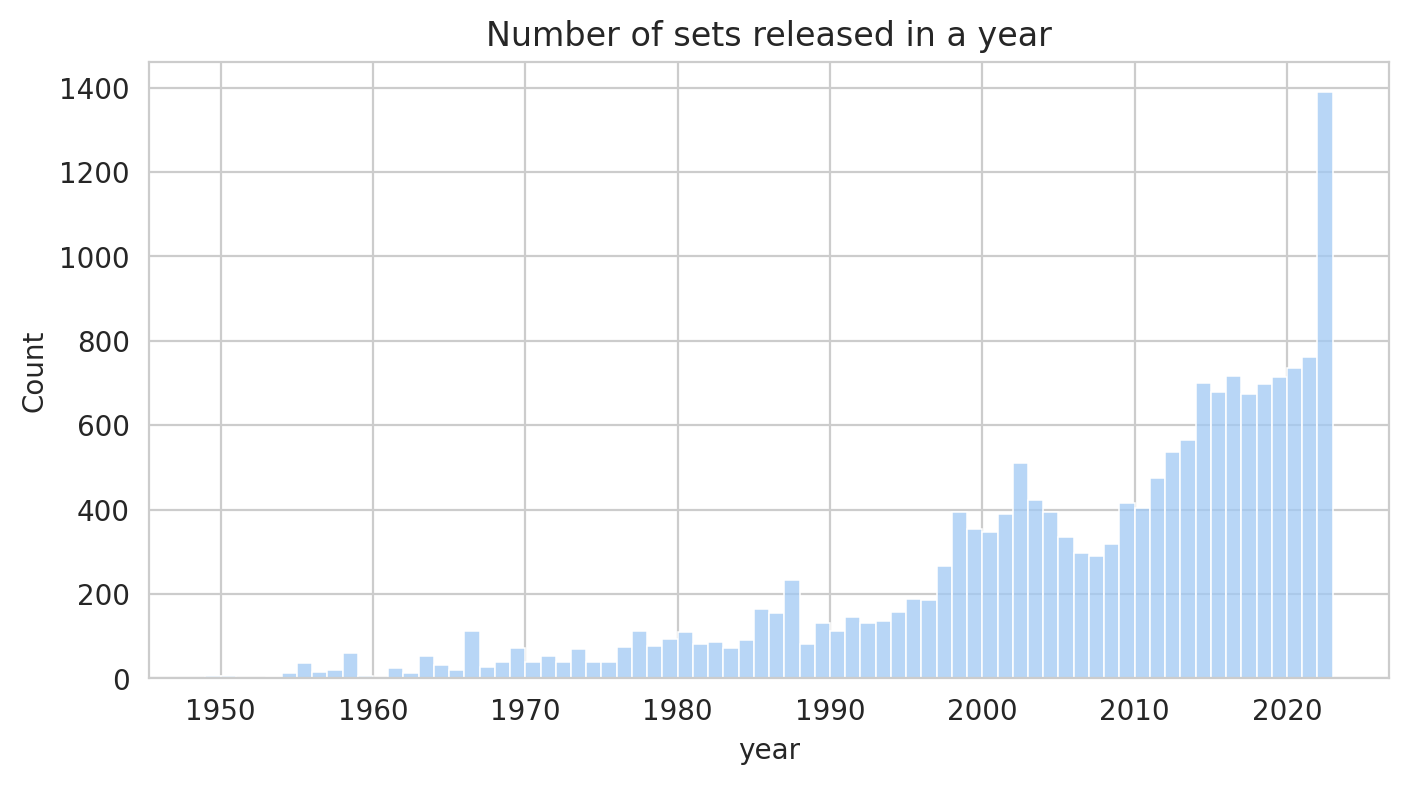

In [15]:
fig = plt.figure(figsize=(8,4))
sns.histplot(data=sets, x='year', binwidth=1)
plt.title('Number of sets released in a year')
plt.show()

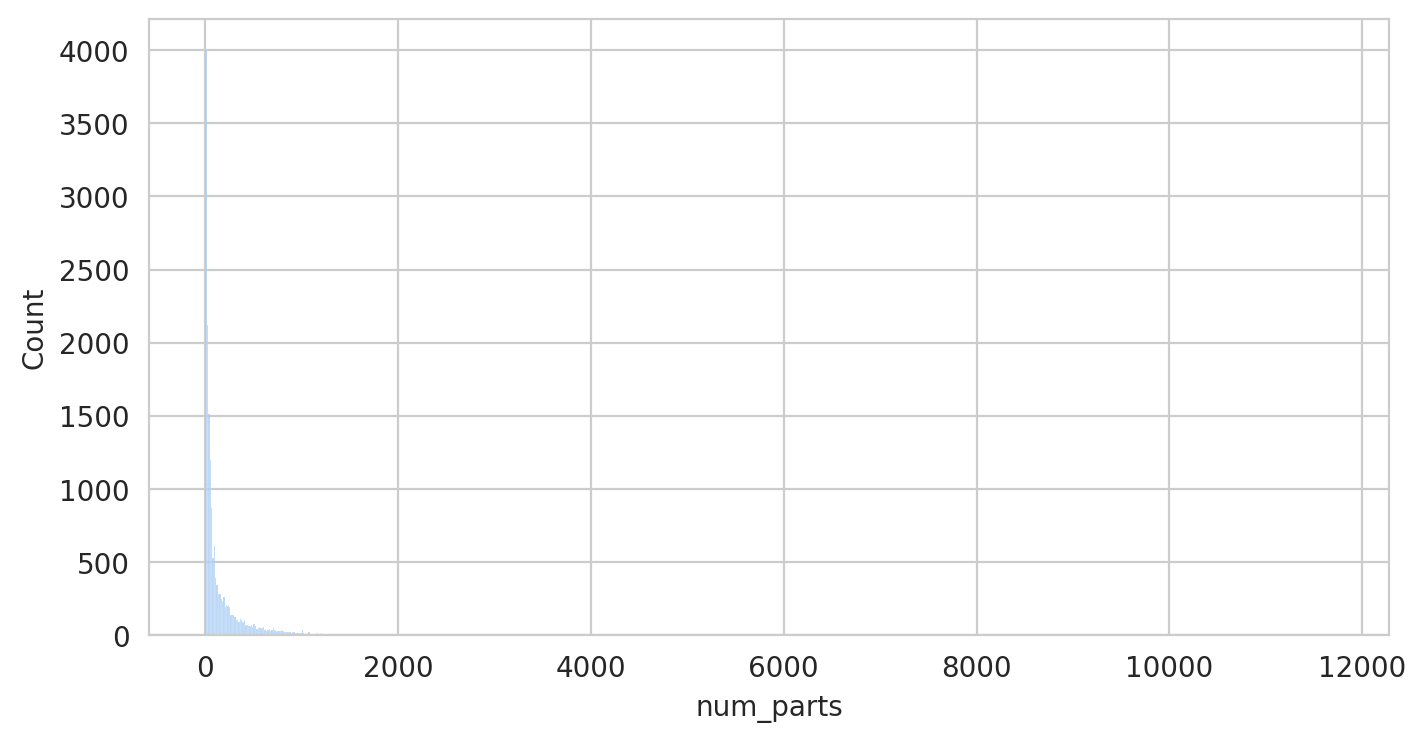

In [16]:
fig = plt.figure(figsize=(8,4))
sns.histplot(data=sets, x='num_parts')
plt.show()

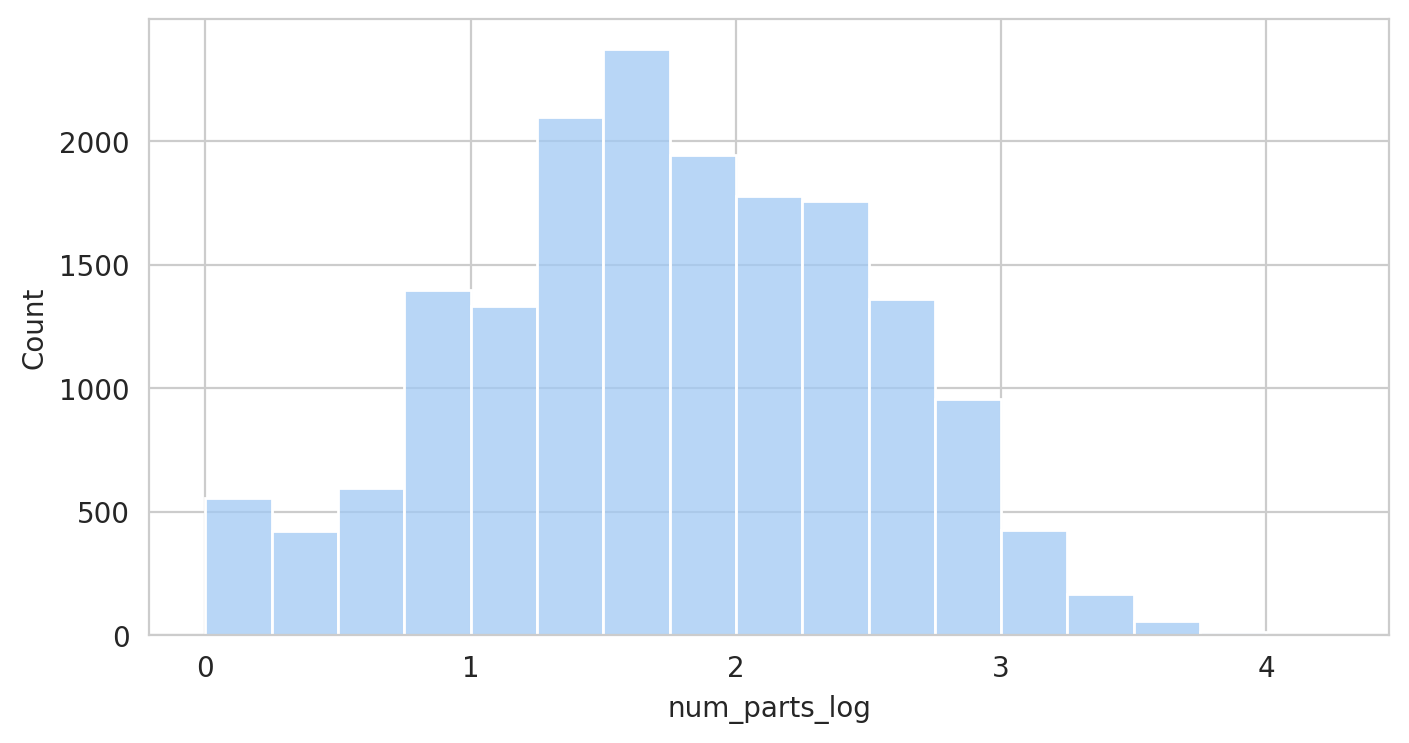

In [17]:
sets['num_parts_log'] = sets['num_parts'].apply(np.log10)
fig = plt.figure(figsize=(8,4))
sns.histplot(data=sets, x='num_parts_log', binwidth=0.25)
plt.show()